# Understanding School Performance on Pennsylvania Standardized Tests

## Data Wrangling

The datasets are from https://futurereadypa.org/Home/DataFiles, which is a website launched by the Pennsylvania Department of Education.  

We will be working with two datasets, both corresponding to the 2018-2019 school year.
- School Performance Data for 2018-2019 School Year
- School Fiscal Data for 2018-2019 School Year

The outline of this notebook is as follows:

1. Import packages
2. School Performance Data 2018-2019
3. School Fiscal Data 2018-2019
4. Join dataframes
5. Data cleaning

## 1. Import packages

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 2. School Performance Data 2018-2019

In [2]:
perf_data1 = pd.read_excel('../Data/FutureReadyPerformance_20182019.xlsx', sheet_name = 'Schools A to L')
perf_data2 = pd.read_excel('../Data/FutureReadyPerformance_20182019.xlsx', sheet_name = 'Schools L to Z')

We'll concatenate these two datasets into one dataset called 'perf_data'

In [3]:
#Concatenate two excel sheets into one dataframe

perf_data = pd.concat([perf_data1, perf_data2], ignore_index=True)

In [4]:
#Confirm that the length of perf_data1 + length of perf_data2 adds up to length of perf_data

len(perf_data1)+len(perf_data2)==len(perf_data)

True

In [5]:
# examine first few rows of dataframe

perf_data.head(20)

,DistrictName,Name,AUN,Schl,DataElement,DisplayValue
0,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,2 or More Races,5.67
1,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,American Indian/Alaskan Native,0.32
2,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,Annual Progress Growth Science/Biology (2 or M...,IS
3,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,Annual Progress Growth Science/Biology (All St...,redup
4,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,Annual Progress Growth Science/Biology (Americ...,IS
5,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,Annual Progress Growth Science/Biology (Asian),IS
6,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,Annual Progress Growth Science/Biology (Black),greenup
7,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,Annual Progress Growth Science/Biology (Econom...,redup
8,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,Annual Progress Growth Science/Biology (Englis...,IS
9,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,Annual Progress Growth Science/Biology (Hawaii...,IS


Let's take a look at what fields are shown in the 'DataElement' column.

In [6]:
print(perf_data['DataElement'].unique())

['2 or More Races' 'American Indian/Alaskan Native '
 'Annual Progress Growth Science/Biology (2 or More Races)'
 'Annual Progress Growth Science/Biology (All Student)'
 'Annual Progress Growth Science/Biology (American Indian/Alaska Native)'
 'Annual Progress Growth Science/Biology (Asian)'
 'Annual Progress Growth Science/Biology (Black)'
 'Annual Progress Growth Science/Biology (Economically Disadvantaged)'
 'Annual Progress Growth Science/Biology (English Learner)'
 'Annual Progress Growth Science/Biology (Hawaiian/Pacific Islander)'
 'Annual Progress Growth Science/Biology (Hispanic)'
 'Annual Progress Growth Science/Biology (Students with Disabilities)'
 'Annual Progress Growth Science/Biology (White)'
 'Annual Progress Percent Industry-Based Learning  (2 or More Races)'
 'Annual Progress Percent Industry-Based Learning  (All Student)'
 'Annual Progress Percent Industry-Based Learning  (Asian)'
 'Annual Progress Percent Industry-Based Learning  (Black)'
 'Annual Progress Percent 

Here are the fields that we are concerned with, along with some definitions from https://futurereadypa.org/Home/Glossary

- <b>'2 or More Races':</b> The percent of multi-racial (not Hispanic) students in the school based on October Student Snapshot enrollment equals the number of multi-racial (not Hispanic) native students in the school divided by total school enrollment.
- <b>'American Indian/Alaskan Native ':</b> The percent of American Indian or Alaskan (not Hispanic) native students in the school based on October Student Snapshot enrollment equals the number of American Indian or Alaskan (not Hispanic) Native students in the school divided by total school enrollment.
- <b>'Asian ':</b> The percent of Asian native students (not Hispanic) in the school based on October Student Snapshot enrollment equals the number of Asian native students in the school divided by total school enrollment.
- <b>'Black/African American ':</b> The percent of Black or African American (not Hispanic) students in the school based on October Student Snapshot enrollment equals the number of Black or African American (not Hispanic) native students in the school divided by total school enrollment.
- <b>'Economically Disadvantaged':</b> The percent of students who are considered economically disadvantaged in the school based on October Student Snapshot enrollment equals the number of students identified as economically disadvantaged in the school divided by total school enrollment. It is at the discretion of the District to determine if a student is economically disadvantaged. 
- <b>'English Learner':</b> The percent of students enrolled in English as a Second Language program in the school reported on October Student Snapshot equals the number of students identified as English Language Learners in the school divided by total school enrollment. 
- <b>'Female (School)':</b> The percent of female students in the school based on October Student Snapshot enrollment equals the number of female students in the school divided by the total school population.
- <b>'Foster Care':</b> This data element indicates the percent of students with foster care experience.
- <b>'Hispanic ':</b> The percent of Hispanic students in the school based on October Student Snapshot enrollment equals the number of Hispanic native students in the school divided by total school enrollment.
- <b>'Homeless':</b> This data element indicates the percent of students who lack a fixed, regular, and adequate nighttime residence in accordance with the McKinney-Vento Act.
- <b>'Male (School)':</b> The percent of male students in the school based on October Student Snapshot enrollment equals the number of male students in the school divided by the total school population.
- <b>'Military Connected':</b> This data element indicates the percent of students with Military Family connections.
- <b>'Native Hawaiian or other Pacific Islander ':</b> The percent of Native Hawaiian or Other Pacific Islander (not Hispanic) students in the school based on October Student Snapshot enrollment equals the number of Native Hawaiian or Other Pacific Islander (not Hispanic) native students in the school divided by total school enrollment. 
- <b>'Percent of Gifted Students':</b> The percent of students in the school with a Gifted Individualized Education Plan (GIEP) based on October Student Snapshot enrollment equals the number of students in the school with a Gifted Individualized Education Program (GIEP) divided by the total number of students in the school.
- <b>'Percent Regular Attendance (All Student)':</b> This indicator is the percentage of students enrolled in a school for 90 or more school days and present 90 percent or more of these school days. 
- <b>'School Enrollment'</b>
- <b>'School Name'</b>
- <b>'Special Education':</b> The percent of school-age students receiving special education services in the school based on the Special Education December collection and the October Student Snapshot enrollment equals the number of students receiving special education services divided by the total school enrollment. 
- <b>'Title I School':</b> This indicator shows Title I status. Title I, Part A (Title I) of the Elementary and Secondary Education Act (ESEA) provides financial assistance to local educational agencies (LEAs) and schools with high numbers or high percentages of children from low-income families to help ensure that all children meet challenging state academic standards.
- <b>'White ':</b> The percent of white (not Hispanic) students in the school based on October Student Snapshot enrollment equals the number of white (not Hispanic) native students in the school divided by total school enrollment. 


- <u>TARGET VARIABLE:</u><b> 'Percent Proficient or Advanced ELA/Literature  (All Student)'</b>
- <u>TARGET VARIABLE:</u><b> 'Percent Proficient or Advanced Mathematics/Algebra 1  (All Student)'</b>

We will filter our dataframe to only include these data elements, and then we will convert the dataset into a 'wide' format.

In [7]:
data_elements = ['2 or More Races', 
                 'American Indian/Alaskan Native ',
                 'Asian ',
                 'Black/African American ', 
                 'Economically Disadvantaged',
                 'English Learner',
                 'Female (School)', 
                 'Foster Care',
                 'Hispanic ', 
                 'Homeless',
                 'Male (School)',
                 'Military Connected', 
                 'Native Hawaiian or other Pacific Islander ',
                 'Percent of Gifted Students',
                 'Percent Regular Attendance (All Student)',
                 'School Enrollment',
                 'Special Education',
                 'Title I School',
                 'White ',
                 'Percent Proficient or Advanced ELA/Literature  (All Student)', 
                 'Percent Proficient or Advanced Mathematics/Algebra 1  (All Student)']

perf_data_filtered = perf_data[perf_data['DataElement'].isin(data_elements)]

In [8]:
perf_data_filtered.head(25)

,DistrictName,Name,AUN,Schl,DataElement,DisplayValue
0,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,2 or More Races,5.67
1,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,American Indian/Alaskan Native,0.32
35,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,Asian,1.46
36,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,Black/African American,10.36
37,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,Economically Disadvantaged,17.25
39,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,English Learner,0.24
127,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,Female (School),60.65
128,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,Foster Care,0.08
130,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,Hispanic,7.85
131,21st Century Cyber CS,21st Century Cyber CS,124150002,7691,Homeless,2.19


In [9]:
# confirm that the data elements were filtered correctly
len(perf_data_filtered.DataElement.unique()) == len(data_elements)

True

In [10]:
#convert dataframe into wide format
perf_data_pivot = perf_data_filtered.pivot(index=['DistrictName', 'AUN', 'Name', 'Schl'], columns='DataElement', values='DisplayValue')
perf_data_pivot = perf_data_pivot.reset_index().rename_axis(None, axis = 1)

In [11]:
perf_data_pivot.head(5)

,DistrictName,AUN,Name,Schl,2 or More Races,American Indian/Alaskan Native,Asian,Black/African American,Economically Disadvantaged,English Learner,...,Military Connected,Native Hawaiian or other Pacific Islander,Percent Proficient or Advanced ELA/Literature (All Student),Percent Proficient or Advanced Mathematics/Algebra 1 (All Student),Percent Regular Attendance (All Student),Percent of Gifted Students,School Enrollment,Special Education,Title I School,White
0,21st Century Cyber CS,124150002,21st Century Cyber CS,7691,5.67,0.32,1.46,10.36,17.25,0.24,...,0.73,0,61.8,38.9,99.8,2.35,1235,14.41,No,74.33
1,A W Beattie Career Center,103020407,A W Beattie Career Center,5273,2.95,0.13,1.67,4.75,37.74,1.54,...,0,0.39,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply,68.6,0.26,779,39.54,No,87.55
2,ACT Academy Cyber CS,126514368,ACT Academy Cyber CS,8217,2.63,0,0,84.21,46.05,0,...,0,0,36.8,15.8,17.8,0,76,26.32,Yes,9.21
3,ASPIRA Bilingual Cyber Charter School,181519176,ASPIRA Bilingual Cyber Charter School,8148,0.82,0,1.1,15.62,48.77,30.96,...,0,0,11.1,4.9,68.1,0,365,47.4,Yes,1.64
4,Abington Heights School District,119350303,Abington Heights HS,5091,0.58,0.19,4.27,1.65,19.2,0.58,...,0,0,94.6,87.0,86.9,1.65,1031,13.77,No,91.17


In [12]:
perf_data_pivot.columns

Index(['DistrictName', 'AUN', 'Name', 'Schl', '2 or More Races',
       'American Indian/Alaskan Native ', 'Asian ', 'Black/African American ',
       'Economically Disadvantaged', 'English Learner', 'Female (School)',
       'Foster Care', 'Hispanic ', 'Homeless', 'Male (School)',
       'Military Connected', 'Native Hawaiian or other Pacific Islander ',
       'Percent Proficient or Advanced ELA/Literature  (All Student)',
       'Percent Proficient or Advanced Mathematics/Algebra 1  (All Student)',
       'Percent Regular Attendance (All Student)',
       'Percent of Gifted Students', 'School Enrollment', 'Special Education',
       'Title I School', 'White '],
      dtype='object')

In [13]:
perf_data_pivot.shape

(2966, 25)

Some of our column names have extra spaces in them.  We'll correct this here for ease of future reference.  We'll also rename 'Name' as 'SchoolName' and 'Schl' as 'SchoolNumber' for clarity.

In [14]:
# dictionary of column names to rename
rename_cols = {'Name':'SchoolName',
               'Schl':'SchoolNumber',
               'American Indian/Alaskan Native ':'American Indian/Alaskan Native',
               'Asian ':'Asian',
               'Black/African American ':'Black/African American',
               'Hispanic ':'Hispanic',
               'Native Hawaiian or other Pacific Islander ':'Native Hawaiian or other Pacific Islander',
               'Percent Proficient or Advanced ELA/Literature  (All Student)':'Percent Proficient or Advanced ELA/Literature (All Student)',
               'Percent Proficient or Advanced Mathematics/Algebra 1  (All Student)':'Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)',
               'White ':'White'
              }

perf_data_pivot.rename(columns=rename_cols, inplace=True)

## 3. School Fiscal Data 2018-2019

In [15]:
fiscal_data = pd.read_excel('../Data/School Fiscal Data SY 2018-2019.xlsx')

In [16]:
fiscal_data.head()

,DistrictName,SchoolName,Schl,AcademicYearId,AUN,DataElement,DisplayValue
0,Albert Gallatin Area SD,Albert Gallatin Area SHS,6001,19,101260303,Federal - Non-Personnel,35.22
1,Albert Gallatin Area SD,Albert Gallatin North MS,7607,19,101260303,Federal - Non-Personnel,41.89
2,Albert Gallatin Area SD,Albert Gallatin South MS,7608,19,101260303,Federal - Non-Personnel,41.81
3,Albert Gallatin Area SD,Friendship Hill El Sch,4922,19,101260303,Federal - Non-Personnel,160.13
4,Albert Gallatin Area SD,George J Plava El Sch,2129,19,101260303,Federal - Non-Personnel,108.38


In [17]:
fiscal_data['DataElement'].unique()

array(['Federal - Non-Personnel', 'Federal - Personnel',
       'Local - Non-Personnel', 'Local - Personnel',
       'State - Non-Personnel', 'State - Personnel'], dtype=object)

Using the data glossary provided by: https://futurereadypa.org/Home/Glossary

We can interpret the DataElements as follows:

- <b>Federal - Non-Personnel: </b>The federal amount spent per pupil for public elementary and secondary education (pre-K through 12th grade) on non-personnel.

- <b>Federal - Personnel: </b>The federal amount spent per pupil for public elementary and secondary education (pre-K through 12th grade) on personnel.

- <b>Local - Non-Personnel: </b>The local amount spent per pupil for public elementary and secondary education (pre-K through 12th grade) on non-personnel.

- <b>Local - Personnel: </b>The local amount spent per pupil for public elementary and secondary education (pre-K through 12th grade) on personnel.

- <b>State - Non-Personnel: </b>The state amount spent per pupil for public elementary and secondary education (pre-K through 12th grade) on non-personnel.

- <b>State - Personnel: </b>The state amount spent per pupil for public elementary and secondary education (pre-K through 12th grade) on personnel.

We'll now use the pivot method to convert this dataset into a wide format.

In [18]:
#convert fiscal_data dataframe into wide format
fiscal_data_pivot = fiscal_data.pivot(index=['Schl'], columns='DataElement', values='DisplayValue')
fiscal_data_pivot = fiscal_data_pivot.reset_index().rename_axis(None, axis = 1)

In [19]:
fiscal_data_pivot.head()

,Schl,Federal - Non-Personnel,Federal - Personnel,Local - Non-Personnel,Local - Personnel,State - Non-Personnel,State - Personnel
0,3,19.33,17.18,1649.15,6224.19,1214.51,4507.17
1,10,28.26,35.22,1783.21,8429.74,725.34,3634.26
2,13,0.00,0.00,985.70,6776.74,628.30,4319.59
3,14,0.00,0.00,1142.93,7761.11,728.52,4947.04
4,17,36.85,185.30,1519.99,7643.47,746.18,3752.25


In [20]:
fiscal_data_pivot.shape

(2804, 7)

## 4. Join dataframes

In [21]:
df = pd.merge(perf_data_pivot, fiscal_data_pivot, 
              left_on=['SchoolNumber'],
              right_on= ['Schl'], 
              how = 'inner')

In [22]:
df.drop('Schl', axis = 1, inplace = True)

In [23]:
df.head()

,DistrictName,AUN,SchoolName,SchoolNumber,2 or More Races,American Indian/Alaskan Native,Asian,Black/African American,Economically Disadvantaged,English Learner,...,School Enrollment,Special Education,Title I School,White,Federal - Non-Personnel,Federal - Personnel,Local - Non-Personnel,Local - Personnel,State - Non-Personnel,State - Personnel
0,21st Century Cyber CS,124150002,21st Century Cyber CS,7691,5.67,0.32,1.46,10.36,17.25,0.24,...,1235,14.41,No,74.33,0.00,0.00,0.00,0.00,0.00,0.00
1,ASPIRA Bilingual Cyber Charter School,181519176,ASPIRA Bilingual Cyber Charter School,8148,0.82,0,1.1,15.62,48.77,30.96,...,365,47.4,Yes,1.64,550.35,1467.44,15709.09,2864.41,0.00,0.00
2,Abington Heights School District,119350303,Abington Heights HS,5091,0.58,0.19,4.27,1.65,19.2,0.58,...,1031,13.77,No,91.17,79.66,205.91,2756.53,7125.69,1248.90,3228.43
3,Abington Heights School District,119350303,Abington Heights MS,6839,1.07,0.18,6.34,1.61,21.72,1.25,...,1119,14.66,Yes,86.86,78.66,203.33,2722.02,7036.48,1233.26,3188.01
4,Abington Heights School District,119350303,Clarks Summit El Sch,7570,1.47,0,7.67,2.36,20.94,5.6,...,339,10.62,Yes,81.42,79.86,206.43,2763.46,7143.61,1252.04,3236.55


In [24]:
df.shape

(2804, 31)

In [25]:
df.columns

Index(['DistrictName', 'AUN', 'SchoolName', 'SchoolNumber', '2 or More Races',
       'American Indian/Alaskan Native', 'Asian', 'Black/African American',
       'Economically Disadvantaged', 'English Learner', 'Female (School)',
       'Foster Care', 'Hispanic', 'Homeless', 'Male (School)',
       'Military Connected', 'Native Hawaiian or other Pacific Islander',
       'Percent Proficient or Advanced ELA/Literature (All Student)',
       'Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)',
       'Percent Regular Attendance (All Student)',
       'Percent of Gifted Students', 'School Enrollment', 'Special Education',
       'Title I School', 'White', 'Federal - Non-Personnel',
       'Federal - Personnel', 'Local - Non-Personnel', 'Local - Personnel',
       'State - Non-Personnel', 'State - Personnel'],
      dtype='object')

We'll reorder our columns so that features in the same category are grouped together and our target variables are at the end.

In [26]:
ordered_cols = ['DistrictName', 
                'AUN', 
                'SchoolName', 
                'SchoolNumber',
                'Title I School',
                'School Enrollment',
                
                'Male (School)',
                'Female (School)',
                
                'Percent Regular Attendance (All Student)',
                
                'American Indian/Alaskan Native', 
                'Asian', 
                'Black/African American',
                'Hispanic',
                'Native Hawaiian or other Pacific Islander',
                'White',
                '2 or More Races',
                
                'English Learner',
                'Special Education',
                'Percent of Gifted Students',
                
                'Economically Disadvantaged',
                'Foster Care',
                'Homeless',
                'Military Connected',
                
                'Local - Non-Personnel', 
                'Local - Personnel',
                'State - Non-Personnel', 
                'State - Personnel',
                'Federal - Non-Personnel',
                'Federal - Personnel', 
                
                'Percent Proficient or Advanced ELA/Literature (All Student)',
                'Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)'
               ]

In [27]:
df=df[ordered_cols]
df.head()

,DistrictName,AUN,SchoolName,SchoolNumber,Title I School,School Enrollment,Male (School),Female (School),Percent Regular Attendance (All Student),American Indian/Alaskan Native,...,Homeless,Military Connected,Local - Non-Personnel,Local - Personnel,State - Non-Personnel,State - Personnel,Federal - Non-Personnel,Federal - Personnel,Percent Proficient or Advanced ELA/Literature (All Student),Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)
0,21st Century Cyber CS,124150002,21st Century Cyber CS,7691,No,1235,39.35,60.65,99.8,0.32,...,2.19,0.73,0.00,0.00,0.00,0.00,0.00,0.00,61.8,38.9
1,ASPIRA Bilingual Cyber Charter School,181519176,ASPIRA Bilingual Cyber Charter School,8148,Yes,365,54.79,45.21,68.1,0,...,1.92,0,15709.09,2864.41,0.00,0.00,550.35,1467.44,11.1,4.9
2,Abington Heights School District,119350303,Abington Heights HS,5091,No,1031,53.83,46.17,86.9,0.19,...,0,0,2756.53,7125.69,1248.90,3228.43,79.66,205.91,94.6,87.0
3,Abington Heights School District,119350303,Abington Heights MS,6839,Yes,1119,52.28,47.72,90.9,0.18,...,0.09,0,2722.02,7036.48,1233.26,3188.01,78.66,203.33,76.0,53.9
4,Abington Heights School District,119350303,Clarks Summit El Sch,7570,Yes,339,57.52,42.48,96.2,0,...,0,0.88,2763.46,7143.61,1252.04,3236.55,79.86,206.43,75.2,61.0


## 5. Data Cleaning

### Duplicate rows

We'll first check for duplicate rows.

In [28]:
# Selecting duplicate rows except first occurrence based on all columns
duplicate = df[df.duplicated()]
  
print("Duplicate Rows :")
  
# Print the dataframe
duplicate

Duplicate Rows :


,DistrictName,AUN,SchoolName,SchoolNumber,Title I School,School Enrollment,Male (School),Female (School),Percent Regular Attendance (All Student),American Indian/Alaskan Native,...,Homeless,Military Connected,Local - Non-Personnel,Local - Personnel,State - Non-Personnel,State - Personnel,Federal - Non-Personnel,Federal - Personnel,Percent Proficient or Advanced ELA/Literature (All Student),Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)


Great! Our dataframe does not have any duplicate rows. Next we'll check for null values.

### Check datatypes

Here we'll check the data type for each of our variables.  We want to make sure that all of our columns that <i>should</i> be numeric contain only numeric values.  If otherwise, we will need to correct them.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2804 entries, 0 to 2803
Data columns (total 31 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   DistrictName                                                        2804 non-null   object 
 1   AUN                                                                 2804 non-null   int64  
 2   SchoolName                                                          2804 non-null   object 
 3   SchoolNumber                                                        2804 non-null   int64  
 4   Title I School                                                      2801 non-null   object 
 5   School Enrollment                                                   2799 non-null   object 
 6   Male (School)                                                       2799 non-null   object 
 7   Female (School)

Many of our features that should be numeric are showing up as an 'object' type.  We'll check to make sure that those columns have values that are strictly numeric so that we can convert them.

In [30]:
# apply a lambda function to return boolean value for each column 
#identifying whether the column has values that are strictly numeric
df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

DistrictName                                                          False
AUN                                                                    True
SchoolName                                                            False
SchoolNumber                                                           True
Title I School                                                        False
School Enrollment                                                     False
Male (School)                                                         False
Female (School)                                                       False
Percent Regular Attendance (All Student)                              False
American Indian/Alaskan Native                                        False
Asian                                                                 False
Black/African American                                                False
Hispanic                                                              False
Native Hawai

The following columns that <i>should</i> be numeric seem to have non-numeric values in them:

- School Enrollment
- Male (School)
- Female (School)
- Percent Regular Attendance (All Student)
- American Indian/Alaskan Native
- Asian
- Black/African American
- Hispanic
- Native Hawaiian or other Pacific Islander
- White
- 2 or More Races
- English Learner
- Special Education
- Percent of Gifted Students
- Economically Disadvantaged
- Foster Care
- Homeless
- Military Connected
- Percent Proficient or Advanced ELA/Literature (All Student)
- Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)

We'll examine each of the non-numeric values in these columns, starting with 'School Enrollment'.

In [31]:
#find rows where 'School Enrollment' is non-numeric
df[pd.to_numeric(df['School Enrollment'], errors='coerce').isnull()]

,DistrictName,AUN,SchoolName,SchoolNumber,Title I School,School Enrollment,Male (School),Female (School),Percent Regular Attendance (All Student),American Indian/Alaskan Native,...,Homeless,Military Connected,Local - Non-Personnel,Local - Personnel,State - Non-Personnel,State - Personnel,Federal - Non-Personnel,Federal - Personnel,Percent Proficient or Advanced ELA/Literature (All Student),Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)
158,Benton Area School District,116191004,Benton Area HS,8434,NaN,NaN,NaN,NaN,NaN,NaN,...,3.91,NaN,3013.27,14039.88,0.00,0.00,0.00,0.00,85.2,81.5
1044,Juniata County School District,111343603,East Juniata El Sch,8452,Yes,NaN,NaN,NaN,IS,NaN,...,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,54.9,46.9
1048,Juniata County School District,111343603,Juniata El Sch,8451,Yes,NaN,NaN,NaN,IS,NaN,...,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,45.3,33.2
2450,Tunkhannock Area School District,118667503,Tunkhannock Area Intermediate Center,8445,NaN,NaN,NaN,NaN,NaN,NaN,...,1.53,NaN,1509.31,6972.80,1794.03,8288.13,128.59,672.88,62.2,37.0
2643,West Greene School District,101308503,West Greene JSHS,8442,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,7763.56,11015.29,0.00,6054.59,52.85,90.40,64.0,43.2


Seems like these rows have more than one NaN value. We'll look at a transposed view of these observations to gain a better understanding of how many values are missing.

In [33]:
df[pd.to_numeric(df['School Enrollment'], errors='coerce').isnull()].transpose()

,158,1044,1048,2450,2643
DistrictName,Benton Area School District,Juniata County School District,Juniata County School District,Tunkhannock Area School District,West Greene School District
AUN,116191004,111343603,111343603,118667503,101308503
SchoolName,Benton Area HS,East Juniata El Sch,Juniata El Sch,Tunkhannock Area Intermediate Center,West Greene JSHS
SchoolNumber,8434,8452,8451,8445,8442
Title I School,NaN,Yes,Yes,NaN,NaN
School Enrollment,NaN,NaN,NaN,NaN,NaN
Male (School),NaN,NaN,NaN,NaN,NaN
Female (School),NaN,NaN,NaN,NaN,NaN
Percent Regular Attendance (All Student),NaN,IS,IS,NaN,NaN
American Indian/Alaskan Native,NaN,NaN,NaN,NaN,NaN


All of the rows where 'School Enrollment' is non-numeric have missing values.  We can certainly look up current enrollment numbers, but this project is specifically using data from the 2018-2019 school year.  Additionally, because of the pandemic, current enrollment numbers may not be similar to that of the 2018-2019 school year.  Moreover, the rows with missing 'School Enrollment' values also seem to be missing many other values as well.

As a result, we will drop these rows.  In a real situation, we would consult with the client before dropping these rows to receive their approval to do so.  Alternatively, we could use the data from the previous school year (2017-2018), which would make the assumption that the year-to-year changes in enrollment are not significant.  This approach would also require consultation with the client before moving forward with this.

Here, we will assume that we have received approval from the client to drop these rows. 

In [34]:
#check shape of dataframe to compare before/after dropping rows
df.shape

(2804, 31)

In [35]:
#filter dataframe only for rows where 'School Enrollment' is not NaN
df = df[df['School Enrollment'].notna()]

In [36]:
#check shape again
df.shape

(2799, 31)

This confirms that the correct number of rows were dropped.  We'll check our columns again to see if they have any non-numeric values.

In [37]:
# apply a lambda function to return boolean value for each column 
#identifying whether the column has values that are strictly numeric
df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

DistrictName                                                          False
AUN                                                                    True
SchoolName                                                            False
SchoolNumber                                                           True
Title I School                                                        False
School Enrollment                                                      True
Male (School)                                                          True
Female (School)                                                        True
Percent Regular Attendance (All Student)                              False
American Indian/Alaskan Native                                         True
Asian                                                                  True
Black/African American                                                 True
Hispanic                                                               True
Native Hawai

Now it looks like the only columns with non-numeric values are:
- Percent Regular Attendance (All Student)
- Percent Proficient or Advanced ELA/Literature (All Student)
- Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)

In [38]:
#find rows where 'Percent Regular Attendance (All Student)' is non-numeric
df[pd.to_numeric(df['Percent Regular Attendance (All Student)'], errors='coerce').isnull()]

,DistrictName,AUN,SchoolName,SchoolNumber,Title I School,School Enrollment,Male (School),Female (School),Percent Regular Attendance (All Student),American Indian/Alaskan Native,...,Homeless,Military Connected,Local - Non-Personnel,Local - Personnel,State - Non-Personnel,State - Personnel,Federal - Non-Personnel,Federal - Personnel,Percent Proficient or Advanced ELA/Literature (All Student),Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)
123,Bangor Area School District,120480803,DeFranco El Sch,8450,Yes,534,51.87,48.13,IS,0,...,0.75,0,2083.62,12254.75,0.00,0.00,0.00,219.15,66.6,60.1
124,Bangor Area School District,120480803,Five Points El Sch,8449,No,193,49.74,50.26,IS,0,...,0,0,13748.13,18686.84,0.00,0.00,0.00,121.56,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply
159,Benton Area School District,116191004,Benton Area MS,8433,No,102,50.98,49.02,IS,0.98,...,0.98,0.98,2998.46,13970.90,0.00,0.00,0.00,0.00,69.7,35.4
526,Council Rock School District,122092353,Holland MS,8447,No,979,50.36,49.64,IS,0.1,...,0.2,0.1,2047.98,13475.56,0.00,0.00,0.00,0.00,70.1,48.0
544,Crestwood School District,118401403,Crestwood Secondary Campus,8446,No,1340,51.27,48.73,IS,0,...,0.3,0,1630.19,6894.51,969.51,4100.32,0.00,35.56,75.1,62.7
558,Cumberland Valley School District,115211603,Winding Creek El Sch,8438,No,869,48.68,51.32,IS,0.58,...,0.46,4.14,2290.46,6350.55,375.00,2097.51,6.54,0.00,80.3,63.5
581,Deep Roots Charter School,126516724,Deep Roots Charter School,8425,Yes,281,50.18,49.82,IS,0,...,0,0,8967.92,7018.80,0.00,0.00,0.00,576.93,38.5,10.4
699,Elizabethtown Area School District,113362403,Bainbridge El Sch,2555,No,201,50.25,49.75,IS,0,...,1,0.5,1597.39,7804.16,718.40,3509.78,57.85,282.64,94.1,78.4
866,Greater Nanticoke Area School District,118402603,Greater Nanticoke Area Ed Ctr,8430,No,531,52.73,47.27,IS,0.38,...,1.69,0.94,754.40,2549.03,1517.25,5087.84,29.40,533.50,48.7,13.3
868,Greater Nanticoke Area School District,118402603,Kennedy Early Childhood Center,8429,Yes,504,48.81,51.19,IS,0.2,...,0.99,0,758.52,2716.85,1525.46,5422.48,33.97,1526.92,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply


There are 25 entries where 'Percent Regular Attendance (All Student)' is listed is <b>'IS'</b>.  We are in a similar situation where we <i>could</i> look this information up on https://futurereadypa.org for the current school year.  However, since this is a study using data from the 2018-2019 school year, the current data may not accurately represent the missing data from the 2018-2019 school year.  

In a real situation, we would first consult the client to see if the abbreviation <b>IS</b> means anything.  This will give us a better understanding of the nature of this 'missing value', whether it's missing at random or missing for a reason.

Assuming we have consulted with the client, we will impute these values with either the mean, median, or mode of this column so that we can keep these rows.  We'll need to examine which is the better measure of central tendency for this column, so we will look at the distribution and boxplot of this column.

In [41]:
#replace 'IS' with NaN
df['Percent Regular Attendance (All Student)'].replace('IS', np.NaN, inplace = True)

In [43]:
#convert 'Percent Regular Attendance (All Student)' to numeric type
df['Percent Regular Attendance (All Student)'] = pd.to_numeric(df['Percent Regular Attendance (All Student)'])

In [76]:
att_mean = df['Percent Regular Attendance (All Student)'].mean()
att_median = df['Percent Regular Attendance (All Student)'].median()
att_mode = df['Percent Regular Attendance (All Student)'].mode()[0]
print('Mean: ', att_mean)
print('Median: ', att_median)
print('Mode: ', att_mode)

Mean:  86.1559120403749
Median:  89.9
Mode:  93.8


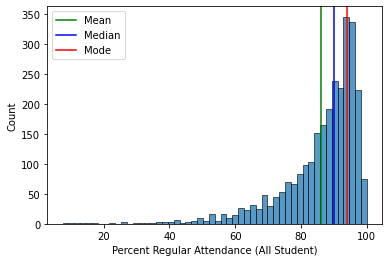

In [81]:
# histogram of 'Percent Regular Attendance (All Student)'
sns.histplot(df['Percent Regular Attendance (All Student)'])

plt.axvline(x=att_mean, color='green')
plt.axvline(x=att_median, color='blue')
plt.axvline(x=att_mode, color='red')

plt.legend({'Mean':att_mean, 'Median':att_median, 'Mode':att_mode})

plt.show()

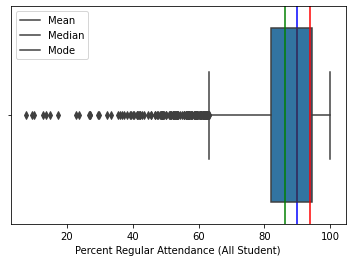

In [82]:
sns.boxplot(x=df['Percent Regular Attendance (All Student)'])
plt.axvline(x=att_mean, color='green')
plt.axvline(x=att_median, color='blue')
plt.axvline(x=att_mode, color='red')

plt.legend({'Mean':att_mean, 'Median':att_median, 'Mode':att_mode})
plt.show()

Given the skewed nature of the distribution of <b>Percent Regular Attendance (All Student)</b>, we will use the <u>mode</u> to impute the missing values.

In [83]:
# impute with mode
df['Percent Regular Attendance (All Student)'] = df['Percent Regular Attendance (All Student)'].fillna(df['Percent Regular Attendance (All Student)'].mode()[0])

Now that we've imputed with the mode, we'll check our columns again for any non-numeric values.

In [84]:
# apply a lambda function to return boolean value for each column 
#identifying whether the column has values that are strictly numeric
df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

DistrictName                                                          False
AUN                                                                    True
SchoolName                                                            False
SchoolNumber                                                           True
Title I School                                                        False
School Enrollment                                                      True
Male (School)                                                          True
Female (School)                                                        True
Percent Regular Attendance (All Student)                               True
American Indian/Alaskan Native                                         True
Asian                                                                  True
Black/African American                                                 True
Hispanic                                                               True
Native Hawai

It looks like our two target variables, <b>Percent Proficient or Advanced ELA/Literature (All Student)</b> and <b>Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)</b> have non-numeric values.  This is concerning and we'll investigate what values we are dealing with.

In [85]:
#find rows where 'Percent Proficient or Advanced ELA/Literature (All Student)' is non-numeric
df[pd.to_numeric(df['Percent Proficient or Advanced ELA/Literature (All Student)'], errors='coerce').isnull()]

,DistrictName,AUN,SchoolName,SchoolNumber,Title I School,School Enrollment,Male (School),Female (School),Percent Regular Attendance (All Student),American Indian/Alaskan Native,...,Homeless,Military Connected,Local - Non-Personnel,Local - Personnel,State - Non-Personnel,State - Personnel,Federal - Non-Personnel,Federal - Personnel,Percent Proficient or Advanced ELA/Literature (All Student),Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)
39,Allentown City School District,121390302,Jackson Early Childhood Center,8413,Yes,270,52.22,47.78,63.6,0.37,...,4.44,0,544.23,4253.50,981.88,7674.02,118.82,928.67,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply
62,Altoona Area School District,108070502,Kimmel Alternative School,7425,No,27,77.78,22.22,13.7,0,...,14.81,0,637.86,6750.41,1489.59,15750.95,0.00,0.00,IS,IS
75,Annville-Cleona School District,113380303,Cleona El Sch,2723,Yes,303,53.47,46.53,94.5,0,...,1.65,0,2419.14,9659.89,0.00,0.00,25.04,613.88,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply
78,Antietam School District,114060503,Mt Penn Primary Ctr,7838,Yes,172,45.93,54.07,91.1,0,...,1.74,0,1030.13,4206.80,675.48,3667.11,9.13,1158.19,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply
105,Avon Grove School District,124150503,Penn London El Sch,7323,Yes,905,51.27,48.73,97.0,0.22,...,2.54,0,1736.68,6631.79,921.83,3520.16,12.71,324.41,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707,Wilkinsburg Borough School District,103029803,Kelly Primary Sch,5106,Yes,286,50.35,49.65,62.1,0,...,5.94,0,802.94,14188.49,184.20,1677.92,483.94,2107.26,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply
2765,Wyoming Area School District,118409203,Wyoming Area Kindergarten Ctr,2875,Yes,144,51.39,48.61,82.3,0,...,0,0.69,1417.09,6695.62,1111.28,5250.70,135.30,365.66,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply
2790,York Suburban School District,112679403,Valley View El Sch,4653,No,325,52,48,92.6,0,...,1.85,0,1592.88,12478.39,570.71,2440.99,1.45,249.40,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply
2793,York Suburban School District,112679403,Yorkshire El Sch,8179,Yes,340,54.71,45.29,94.3,0,...,1.18,0,1657.34,10910.01,382.27,2441.02,9.12,672.14,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply


In [86]:
#find rows where 'Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)' is non-numeric
df[pd.to_numeric(df['Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)'], errors='coerce').isnull()]

,DistrictName,AUN,SchoolName,SchoolNumber,Title I School,School Enrollment,Male (School),Female (School),Percent Regular Attendance (All Student),American Indian/Alaskan Native,...,Homeless,Military Connected,Local - Non-Personnel,Local - Personnel,State - Non-Personnel,State - Personnel,Federal - Non-Personnel,Federal - Personnel,Percent Proficient or Advanced ELA/Literature (All Student),Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)
39,Allentown City School District,121390302,Jackson Early Childhood Center,8413,Yes,270,52.22,47.78,63.6,0.37,...,4.44,0,544.23,4253.50,981.88,7674.02,118.82,928.67,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply
62,Altoona Area School District,108070502,Kimmel Alternative School,7425,No,27,77.78,22.22,13.7,0,...,14.81,0,637.86,6750.41,1489.59,15750.95,0.00,0.00,IS,IS
75,Annville-Cleona School District,113380303,Cleona El Sch,2723,Yes,303,53.47,46.53,94.5,0,...,1.65,0,2419.14,9659.89,0.00,0.00,25.04,613.88,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply
78,Antietam School District,114060503,Mt Penn Primary Ctr,7838,Yes,172,45.93,54.07,91.1,0,...,1.74,0,1030.13,4206.80,675.48,3667.11,9.13,1158.19,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply
105,Avon Grove School District,124150503,Penn London El Sch,7323,Yes,905,51.27,48.73,97.0,0.22,...,2.54,0,1736.68,6631.79,921.83,3520.16,12.71,324.41,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707,Wilkinsburg Borough School District,103029803,Kelly Primary Sch,5106,Yes,286,50.35,49.65,62.1,0,...,5.94,0,802.94,14188.49,184.20,1677.92,483.94,2107.26,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply
2765,Wyoming Area School District,118409203,Wyoming Area Kindergarten Ctr,2875,Yes,144,51.39,48.61,82.3,0,...,0,0.69,1417.09,6695.62,1111.28,5250.70,135.30,365.66,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply
2790,York Suburban School District,112679403,Valley View El Sch,4653,No,325,52,48,92.6,0,...,1.85,0,1592.88,12478.39,570.71,2440.99,1.45,249.40,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply
2793,York Suburban School District,112679403,Yorkshire El Sch,8179,Yes,340,54.71,45.29,94.3,0,...,1.18,0,1657.34,10910.01,382.27,2441.02,9.12,672.14,Suppress:Data Does Not Apply,Suppress:Data Does Not Apply


It's likely that the rows with missing values for ELA scores are the same as the rows with missing values for Math scores.  After doing some quick research into some of these schools, I learned that many of these schools are early education institutions, serving grades that are 2nd grade or below.  The Pennsylvania state assessments begin in the 3rd grade.  

Moreover, it would not make sense to impute missing values in our target variables.  We will assume that we have shared this information with our client, consulted with them, and that we have permission to drop these rows from our dataset.

In [92]:
arr = pd.to_numeric(df['Percent Proficient or Advanced ELA/Literature (All Student)'], errors='coerce').notnull()

In [97]:
df1 = df.loc[arr]

In [98]:
df1

,DistrictName,AUN,SchoolName,SchoolNumber,Title I School,School Enrollment,Male (School),Female (School),Percent Regular Attendance (All Student),American Indian/Alaskan Native,...,Homeless,Military Connected,Local - Non-Personnel,Local - Personnel,State - Non-Personnel,State - Personnel,Federal - Non-Personnel,Federal - Personnel,Percent Proficient or Advanced ELA/Literature (All Student),Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)
0,21st Century Cyber CS,124150002,21st Century Cyber CS,7691,No,1235,39.35,60.65,99.8,0.32,...,2.19,0.73,0.00,0.00,0.00,0.00,0.00,0.00,61.8,38.9
1,ASPIRA Bilingual Cyber Charter School,181519176,ASPIRA Bilingual Cyber Charter School,8148,Yes,365,54.79,45.21,68.1,0,...,1.92,0,15709.09,2864.41,0.00,0.00,550.35,1467.44,11.1,4.9
2,Abington Heights School District,119350303,Abington Heights HS,5091,No,1031,53.83,46.17,86.9,0.19,...,0,0,2756.53,7125.69,1248.90,3228.43,79.66,205.91,94.6,87.0
3,Abington Heights School District,119350303,Abington Heights MS,6839,Yes,1119,52.28,47.72,90.9,0.18,...,0.09,0,2722.02,7036.48,1233.26,3188.01,78.66,203.33,76.0,53.9
4,Abington Heights School District,119350303,Clarks Summit El Sch,7570,Yes,339,57.52,42.48,96.2,0,...,0,0.88,2763.46,7143.61,1252.04,3236.55,79.86,206.43,75.2,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,Yough School District,107658903,Yough SHS,4735,No,655,50.69,49.31,62.7,0,...,0.61,0.15,1370.52,5316.45,1756.39,6813.25,32.11,105.10,67.5,61.5
2799,Young Scholars CS,126513250,Young Scholars CS,7584,Yes,284,43.66,56.34,83.9,0,...,1.76,0,8832.66,6991.93,0.00,75.69,350.10,815.94,29.6,7.5
2800,Young Scholars of Central PA CS,110140001,Young Scholars of Central PA CS,7841,Yes,420,47.86,52.14,92.6,0.24,...,0.24,1.67,0.00,0.00,0.00,0.00,0.00,0.00,69.1,45.0
2801,Young Scholars of McKeesport Charter School,103020368,Young Scholars of McKeesport Charter School,8337,Yes,211,52.13,47.87,74.5,0,...,5.69,0,1573.49,10618.43,0.00,0.00,114.92,2116.42,53.9,30.3


In [100]:
# apply a lambda function to return boolean value for each column 
#identifying whether the column has values that are strictly numeric
df1.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

DistrictName                                                          False
AUN                                                                    True
SchoolName                                                            False
SchoolNumber                                                           True
Title I School                                                        False
School Enrollment                                                      True
Male (School)                                                          True
Female (School)                                                        True
Percent Regular Attendance (All Student)                               True
American Indian/Alaskan Native                                         True
Asian                                                                  True
Black/African American                                                 True
Hispanic                                                               True
Native Hawai

### Check for outliers